# Expense Tracker Financial Recommender App

We are trying to develop a recommender system to predict the likelihood of achieving financial goals and the time it will take based on users' transaction history involves several steps. Here's a high-level guide to approach this:

1. **Data Collection and Preprocessing**:
   - **Transaction History**: Ensure you have sufficient transaction data for each user. This data should include amounts, dates, and types of transactions (e.g., spending, income).
   - **Financial Goals**: Define a set of financial goals, each with an associated value.
   - **Data Cleaning**: Clean the data to handle missing values, outliers, and inconsistencies.

2. **Feature Engineering**:
   - Extract features from the transaction history that may be predictive of financial behavior, such as average monthly spending, income, savings rate, and spending categories.
   - You may also want to include demographic information if available, as it can influence financial behavior.

3. **User Profiling**:
   - Analyze the transaction history to understand each user's financial behavior.
   - Classify users into different categories based on their spending habits, income, and savings rate.

4. **Goal Achievement Prediction**:
   - Develop a model to predict the likelihood of a user achieving a specified financial goal.
   - This could be a classification model (e.g., logistic regression, decision trees, or more advanced machine learning models) that predicts whether the goal is achievable based on the user's financial profile.

5. **Time-to-Goal Prediction**:
   - Develop a regression model to estimate the time it will take for a user to achieve their financial goal.
   - This model can use the same features as the goal achievement prediction model but will aim to predict a continuous variable (time in years).

6. **Model Training and Evaluation**:
   - Split the data into training and testing sets to validate the performance of your models.
   - Use appropriate metrics to evaluate the models (e.g., accuracy, precision, recall for classification models, and mean squared error for regression models).

7. **Implementation of the Recommender System**:
   - Integrate the models into a system that can take a user's transaction history and financial goal as input and provide predictions.
   - Ensure the system is user-friendly and provides actionable insights.



# Data Collection and Preprocessing


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving ledger_alchemy_transactions_v6.zip to ledger_alchemy_transactions_v6.zip


In [ ]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = '/content/ledger_alchemy_transactions_v6.zip'
extract_folder_path = '/content/extracted_data'

In [ ]:
# Extracting the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Listing the extracted files
extracted_files = os.listdir(extract_folder_path)
extracted_files


['Financial_Goals.csv', 'ledger_alchemy_transactions_v6.json']

The contents of the  uploaded zip file, "ledger_alchemy_transactions_v6.zip", have been successfully extracted. It contains two files:

1. `Financial_Goals.csv`
2. `ledger_alchemy_transactions_v6.json`

Next, I'll inspect these files to understand their structure and content, which will help us in developing the recommender system. Let's start by loading and displaying the first few rows of each file.

We have successfully loaded the data from the two files:

1. **Financial Goals Data (`Financial_Goals.csv`):**
   - Columns: `Financial Goal`, `Approximate Amount Needed`
   - This file contains financial goals and their approximate monetary requirements.

2. **User Transactions Data (`ledger_alchemy_transactions_v6.json`):**
   - Contains various columns such as `account_id`, `account_owner`, `amount`, `authorized_date`, and many others.
   - This file appears to have detailed transaction records for different users.


In [ ]:
import pandas as pd

# File paths for the extracted files
financial_goals_file = os.path.join(extract_folder_path, 'Financial_Goals.csv')
transactions_file = os.path.join(extract_folder_path, 'ledger_alchemy_transactions_v6.json')

# Loading the Financial Goals CSV file
financial_goals_df = pd.read_csv(financial_goals_file)

# Loading the Transactions JSON file
transactions_df = pd.read_json(transactions_file)

In [ ]:
# Displaying the first few rows of each dataframe
financial_goals_df.head()

,Financial Goal,Approximate Amount Needed
0,Buy a House,300000
1,Buy a Car,20000
2,Start a Business,50000
3,Retirement Savings,200000
4,Education Fund,40000


In [ ]:
transactions_df.head()

,account_id,account_owner,amount,authorized_date,authorized_datetime,category,category_id,check_number,counterparties,date,...,payment_meta.payee,payment_meta.payer,payment_meta.payment_method,payment_meta.payment_processor,payment_meta.ppd_id,payment_meta.reason,payment_meta.reference_number,personal_finance_category.confidence_level,personal_finance_category.detailed,personal_finance_category.primary
0,Account_109995,Akira Sato,-411.159368,2023-01-29,2023-01-29T01:11:07,"[Travel, Taxi]",22016000,9495,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-01-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Account_109995,Akira Sato,8000.000000,2023-09-28,2023-09-28T00:38:37,"[Transfer, Payroll]",21009000,5658,[],2023-09-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Account_109995,Akira Sato,1500.000000,2023-01-13,2023-01-13T11:11:46,"[Savings, Contribution]",16001000,1805,[],2023-01-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Account_109995,Akira Sato,-180.817089,2023-01-13,2023-01-13T11:11:46,"[Payment, Credit Card]",16001000,1805,[],2023-01-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Account_109995,Akira Sato,-297.264630,2023-11-14,2023-11-14T16:02:38,"[Food and Drink, Restaurants]",13005000,4666,"[{'confidence_level': 'LOW', 'entity_id': None...",2023-11-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [ ]:
# Exploratory Data Analysis (EDA) on the transactions data
# Let's look at the summary statistics and the distribution of key columns

# Summary statistics for the 'amount' column
amount_stats = transactions_df['amount'].describe()

# Count of unique users in the transaction data
unique_users = transactions_df['account_owner'].nunique()

In [ ]:
amount_stats

count    12304.000000
mean       422.973204
std       1472.959487
min       -770.566192
25%       -224.577937
50%         36.529843
75%        477.439880
max       9589.557453
Name: amount, dtype: float64

In [ ]:
unique_users

46

In [ ]:
date_column_sample = transactions_df['date'].head()
date_column_sample, transactions_df['date'].dtype

(0    2023-01-29
 1    2023-09-28
 2    2023-01-13
 3    2023-01-13
 4    2023-11-14
 Name: date, dtype: object,
 dtype('O'))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization style
sns.set(style="whitegrid")

# Basic EDA on the cleaned transactions dataset

# Summary statistics for numerical variables
numerical_summary = transactions_df.describe()

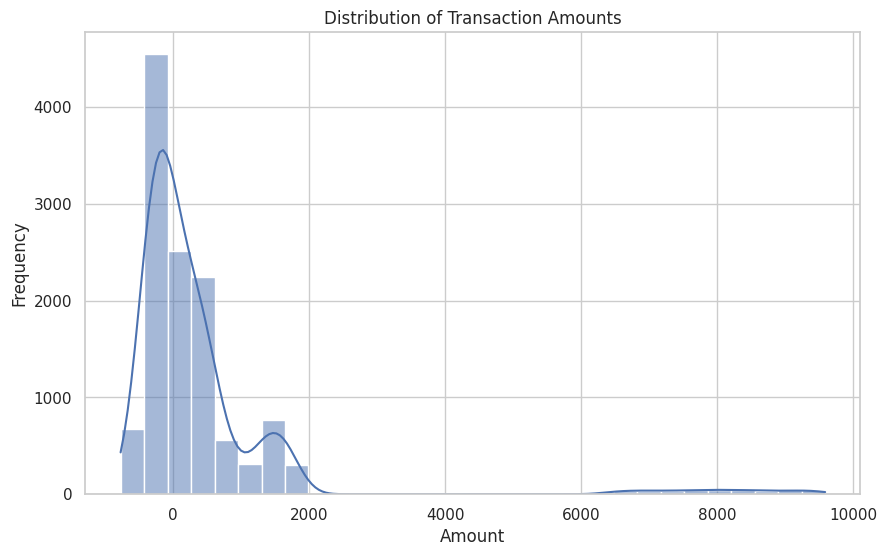

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

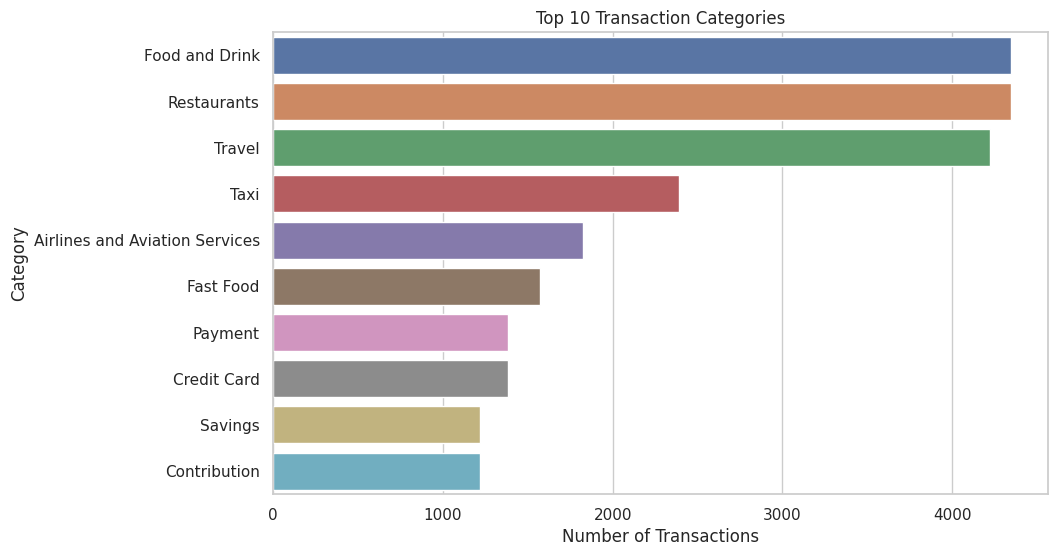

In [ ]:
# Count of transactions by category (Top 10 categories)
top_categories = transactions_df['category'].explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Transaction Categories')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()

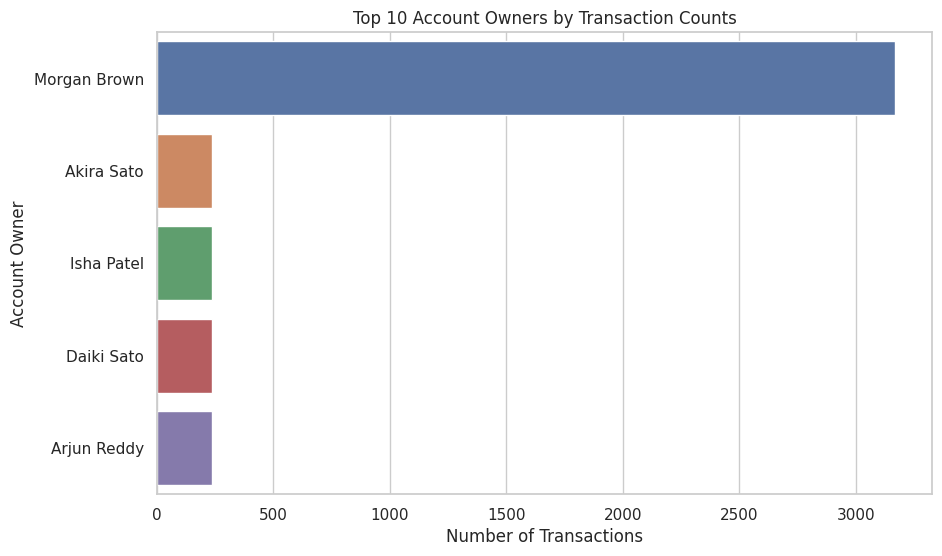

In [ ]:
# Overview of the account owners' transaction counts
account_transaction_counts = transactions_df['account_owner'].value_counts().head()
plt.figure(figsize=(10, 6))
sns.barplot(x=account_transaction_counts.values, y=account_transaction_counts.index)
plt.title('Top 10 Account Owners by Transaction Counts')
plt.xlabel('Number of Transactions')
plt.ylabel('Account Owner')
plt.show()

In [ ]:
numerical_summary

,amount,category_id,check_number,location.address,location.city,location.country,location.lat,location.lon,location.postal_code,location.region,location.store_number,payment_meta.by_order_of,payment_meta.payee,payment_meta.payer,payment_meta.payment_method,payment_meta.payment_processor,payment_meta.ppd_id,payment_meta.reason,payment_meta.reference_number
count,12304.000000,1.230400e+04,12304.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,422.973204,1.768241e+07,5521.728218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1472.959487,4.149923e+06,2501.868049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-770.566192,1.300500e+07,1092.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-224.577937,1.300503e+07,3488.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,36.529843,1.600100e+07,5450.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,477.439880,2.200100e+07,7596.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9589.557453,2.201600e+07,9966.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
top_categories

Food and Drink                    4346
Restaurants                       4346
Travel                            4220
Taxi                              2393
Airlines and Aviation Services    1827
Fast Food                         1575
Payment                           1386
Credit Card                       1386
Savings                           1218
Contribution                      1218
Name: category, dtype: int64

In [ ]:
account_transaction_counts.head()

Morgan Brown    3168
Akira Sato       234
Isha Patel       234
Daiki Sato       234
Arjun Reddy      234
Name: account_owner, dtype: int64

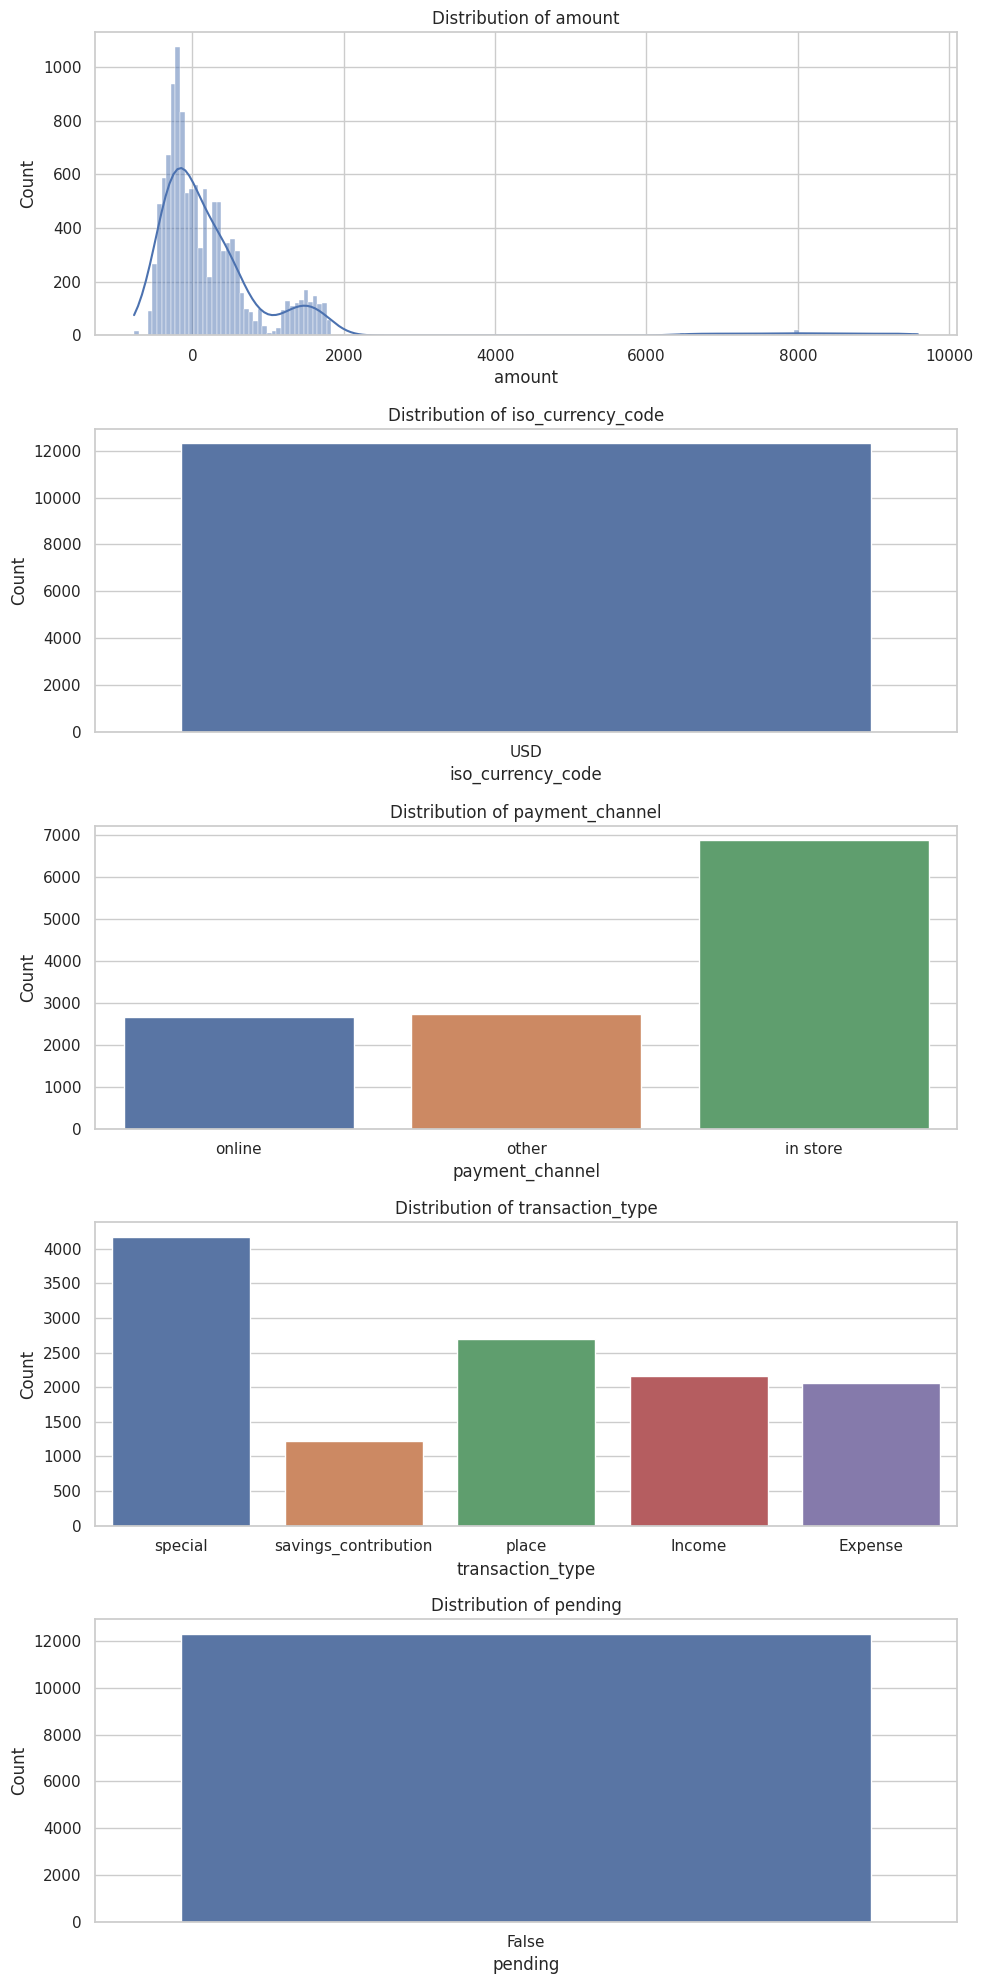

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Since the complex columns require special handling, we will focus on visual exploration of other key columns.

# Selecting a few key columns for visualization
key_columns = ['amount', 'iso_currency_code', 'payment_channel', 'transaction_type', 'pending']

# Creating visualizations for these columns
fig, axes = plt.subplots(nrows=len(key_columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(key_columns):
    # For numerical columns, we use histograms
    if transactions_df[col].dtype in ['float64', 'int64']:
        sns.histplot(transactions_df[col], ax=axes[i], kde=True)
    # For categorical columns, we use count plots
    else:
        sns.countplot(x=transactions_df[col], ax=axes[i])

    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Converting the 'authorized_date' column to datetime format
transactions_df['authorized_date'] = pd.to_datetime(transactions_df['authorized_date'], errors='coerce')

# Checking if the conversion was successful
converted_authorized_date_sample = transactions_df['authorized_date'].head()
converted_authorized_date_sample, transactions_df['authorized_date'].dtype

(0   2023-01-29
 1   2023-09-28
 2   2023-01-13
 3   2023-01-13
 4   2023-11-14
 Name: authorized_date, dtype: datetime64[ns],
 dtype('<M8[ns]'))

# Calculating Financial Indicators : Feature Engineering

## Monthly Income,	Monthly Spending and 	Saving Rate are our Major Financial Indicators

In [ ]:
# Calculating financial indicators using 'authorized_date'

# Grouping transactions by account_owner and authorized_date (month)
grouped_transactions_auth_date = transactions_df.groupby([transactions_df['account_owner'], transactions_df['authorized_date'].dt.to_period("M")])

# Calculating average monthly income and spending for each account owner
monthly_income_auth_date = grouped_transactions_auth_date['amount'].apply(lambda x: x[x > 0].sum())
monthly_spending_auth_date = grouped_transactions_auth_date['amount'].apply(lambda x: -x[x < 0].sum())

# Reshaping the data for easier calculations
monthly_financials_auth_date = pd.DataFrame({'Monthly Income': monthly_income_auth_date, 'Monthly Spending': monthly_spending_auth_date}).reset_index()
monthly_financials_auth_date['Saving Rate'] = (monthly_financials_auth_date['Monthly Income'] - monthly_financials_auth_date['Monthly Spending']) / monthly_financials_auth_date['Monthly Income']

# Averaging the monthly financials for each account owner
average_financials_per_owner_auth_date = monthly_financials_auth_date.groupby('account_owner').mean()

# Displaying the average financial indicators for each account owner
average_financials_per_owner_auth_date.head()


<ipython-input-22-90bf3d4ae484>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_financials_per_owner_auth_date = monthly_financials_auth_date.groupby('account_owner').mean()


,Monthly Income,Monthly Spending,Saving Rate
account_owner,,,
Aanya Gupta 3,4439.241345,580.266626,0.862970
Aanya Khan 15,4454.517996,580.715638,0.862960
Aanya Singh 16,4467.582742,585.648603,0.862475
Aarav Kumar,19082.829904,3713.917088,0.640099
Aarav Patel 17,4442.318192,583.165786,0.862381


# Data Preprocessing after Finalizing Financial Indiactors

In [ ]:
# Flattening the category lists into separate rows
# This involves creating a new row for each category in the category list for each transaction

# Expanding the category lists into separate rows
expanded_categories = transactions_df.explode('category')

# Grouping the expanded data by account_owner and category, and summing the expenses in each category
category_spending_expanded = expanded_categories[expanded_categories['amount'] < 0].groupby(['account_owner', 'category'])['amount'].sum().abs()

# Unstacking the category level to create separate columns for each category
category_spending_unstacked_expanded = category_spending_expanded.unstack().fillna(0)

# Merging with the average financial indicators
combined_data_expanded = category_spending_unstacked_expanded.merge(average_financials_per_owner_auth_date, how='left', on='account_owner')

# Displaying the first few rows of the combined dataset
combined_data_expanded.head()

,Airlines and Aviation Services,Coffee Shop,Credit Card,Fast Food,Food and Drink,Payment,Restaurants,Taxi,Travel,Monthly Income,Monthly Spending,Saving Rate
account_owner,,,,,,,,,,,,
Aanya Gupta 3,1730.994876,910.931718,1157.430645,513.131743,2689.367837,1157.430645,2689.367837,1385.406154,3116.401030,4439.241345,580.266626,0.862970
Aanya Khan 15,1729.399655,914.260768,1149.541624,503.495065,2670.133080,1149.541624,2670.133080,1419.513299,3148.912954,4454.517996,580.715638,0.862960
Aanya Singh 16,1770.263970,931.822290,1131.481480,499.595892,2705.347001,1131.481480,2705.347001,1420.690782,3190.954752,4467.582742,585.648603,0.862475
Aarav Kumar,8433.407341,5449.155924,4111.396051,8213.033877,21045.855107,4111.396051,21045.855107,10976.346563,19409.753904,19082.829904,3713.917088,0.640099
Aarav Patel 17,1703.023275,913.058419,1153.521136,524.334250,2713.836706,1153.521136,2713.836706,1427.608314,3130.631589,4442.318192,583.165786,0.862381


In [ ]:
# Removing the suggested columns
columns_to_remove = [
    'location.address', 'location.city', 'location.country', 'location.lat', 'location.lon',
    'location.postal_code', 'location.region', 'location.store_number', 'merchant_entity_id',
    'merchant_name', 'logo_url', 'website', 'payment_meta.by_order_of', 'payment_meta.payee',
    'payment_meta.payer', 'payment_meta.payment_method', 'payment_meta.payment_processor',
    'payment_meta.ppd_id', 'payment_meta.reason', 'payment_meta.reference_number',
    'personal_finance_category.confidence_level', 'personal_finance_category.detailed',
    'personal_finance_category.primary', 'transaction_code', 'pending_transaction_id',
    'unofficial_currency_code', 'check_number', 'authorized_datetime', 'datetime'
]

# Dropping the columns
cleaned_transactions_df = transactions_df.drop(columns=columns_to_remove)

# Displaying the updated dataframe
cleaned_transactions_df.head()


,account_id,account_owner,amount,authorized_date,category,category_id,counterparties,date,iso_currency_code,location,name,payment_channel,payment_meta,pending,personal_finance_category,personal_finance_category_icon_url,transaction_id,transaction_type
0,Account_109995,Akira Sato,-411.159368,2023-01-29,"[Travel, Taxi]",22016000,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-01-29,USD,"{'address': None, 'city': None, 'country': Non...",Uber 063015 SF**POOL**,online,"{'by_order_of': None, 'payee': None, 'payer': ...",False,"{'confidence_level': 'VERY_HIGH', 'detailed': ...",https://plaid-category-icons.plaid.com/PFC_TRA...,trans_9650578,special
1,Account_109995,Akira Sato,8000.000000,2023-09-28,"[Transfer, Payroll]",21009000,[],2023-09-28,USD,"{'address': None, 'city': None, 'country': Non...",INTRST PYMNT,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,"{'confidence_level': 'HIGH', 'detailed': 'INCO...",https://plaid-category-icons.plaid.com/PFC_INC...,trans_6198504,special
2,Account_109995,Akira Sato,1500.000000,2023-01-13,"[Savings, Contribution]",16001000,[],2023-01-13,USD,"{'address': None, 'city': None, 'country': Non...",Monthly Savings Contribution,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,"{'confidence_level': 'HIGH', 'detailed': 'LOAN...",https://plaid-category-icons.plaid.com/PFC_LOA...,trans_3929349,savings_contribution
3,Account_109995,Akira Sato,-180.817089,2023-01-13,"[Payment, Credit Card]",16001000,[],2023-01-13,USD,"{'address': None, 'city': None, 'country': Non...",CREDIT CARD 3333 PAYMENT *//,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,"{'confidence_level': 'HIGH', 'detailed': 'LOAN...",https://plaid-category-icons.plaid.com/PFC_LOA...,trans_3929349,special
4,Account_109995,Akira Sato,-297.264630,2023-11-14,"[Food and Drink, Restaurants]",13005000,"[{'confidence_level': 'LOW', 'entity_id': None...",2023-11-14,USD,"{'address': None, 'city': None, 'country': Non...",SparkFun,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,"{'confidence_level': 'HIGH', 'detailed': 'ENTE...",https://plaid-category-icons.plaid.com/PFC_ENT...,trans_1670794,place


# Handling Missing values

In [ ]:
# Handling missing values and converting data types

# Checking for missing values
missing_values = cleaned_transactions_df.isnull().sum()

# Converting 'date' and 'authorized_date' to datetime objects
cleaned_transactions_df['date'] = pd.to_datetime(cleaned_transactions_df['date'])
cleaned_transactions_df['authorized_date'] = pd.to_datetime(cleaned_transactions_df['authorized_date'])

missing_values_report = missing_values[missing_values > 0]
missing_values_report


location                     4222
payment_meta                 4222
personal_finance_category    4222
dtype: int64

In [ ]:
# Dropping the 'Location' and 'Payment Meta' columns
cleaned_transactions_df = cleaned_transactions_df.drop(columns=['location', 'payment_meta'])

# Assessing the 'Personal Finance Category' column to decide on its handling
personal_finance_category_missing = cleaned_transactions_df['personal_finance_category'].isnull().mean()

# Checking the percentage of missing values in 'Personal Finance Category'
personal_finance_category_missing_percentage = personal_finance_category_missing * 100

# Dropping the 'Personal Finance Category' column if missing values are significant
if personal_finance_category_missing_percentage > 30:  # Threshold for significant missing values
    cleaned_transactions_df = cleaned_transactions_df.drop(columns=['personal_finance_category'])

personal_finance_category_missing_percentage

34.314044213263976

# Finding  detailed trends with Advanced Exploratory Data Analysis for every Account Owner

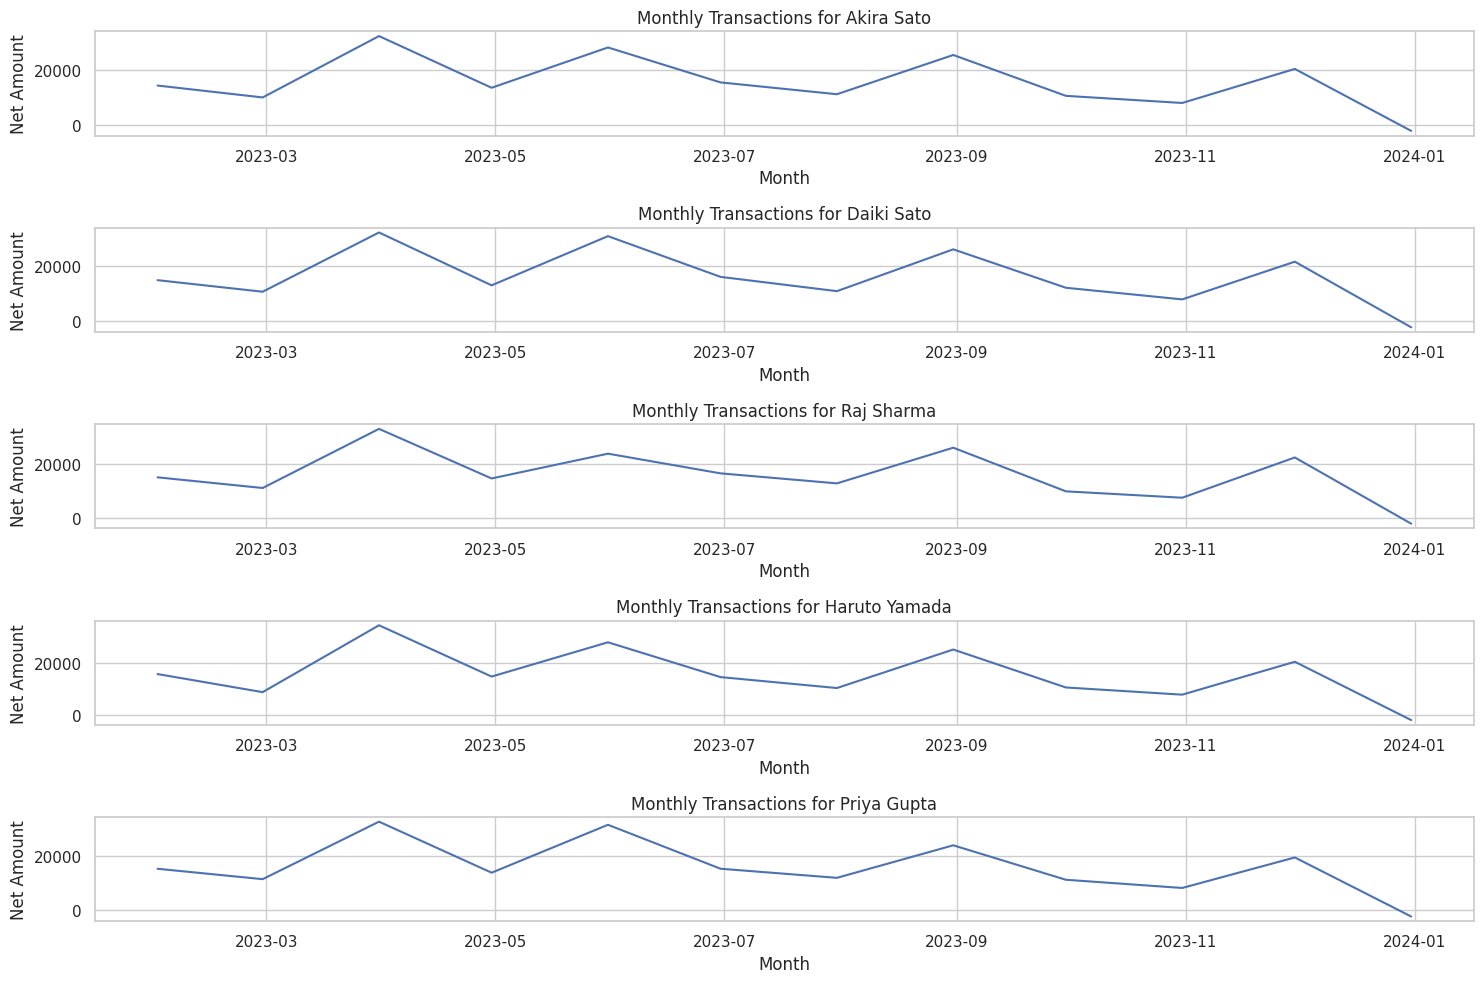

,amount,category_id
count,234.000000,2.340000e+02
mean,804.277977,1.776727e+07
std,2218.445192,4.163439e+06
min,-493.110967,1.300500e+07
25%,-338.981015,1.300503e+07
50%,-193.896233,1.850500e+07
75%,1500.000000,2.200100e+07
max,8000.000000,2.201600e+07


In [ ]:
# Further analysis focused on individual account owners and their spending/saving patterns

# Selecting a sample of account owners for detailed analysis
sample_owners = cleaned_transactions_df['account_owner'].unique()[:5]  # Analyzing the first 5 unique account owners

# Creating a dataframe for each account owner in the sample
owner_dfs = {owner: cleaned_transactions_df[cleaned_transactions_df['account_owner'] == owner] for owner in sample_owners}

# Plotting monthly spending/saving trends for each account owner
plt.figure(figsize=(15, 10))

for i, (owner, df) in enumerate(owner_dfs.items(), 1):
    plt.subplot(len(sample_owners), 1, i)
    monthly_transactions = df.resample('M', on='date')['amount'].sum()
    sns.lineplot(x=monthly_transactions.index, y=monthly_transactions.values)
    plt.title(f'Monthly Transactions for {owner}')
    plt.xlabel('Month')
    plt.ylabel('Net Amount')

plt.tight_layout()
plt.show()

# Providing summary statistics for each account owner
owner_summaries = {owner: df.describe() for owner, df in owner_dfs.items()}

# Displaying summary for the first account owner as an example
first_owner = list(owner_summaries.keys())[0]
owner_summaries[first_owner]

In [ ]:

# Dropping columns with significant missing values
columns_to_drop = ['location', 'payment_meta']
transactions_df_cleaned = transactions_df.drop(columns=columns_to_drop)

# Handling missing values in 'merchant_name' by filling with a placeholder
transactions_df_cleaned['merchant_name'] = transactions_df_cleaned['merchant_name'].fillna('Unknown')

# Feature Engineering: Aggregating transaction data at the 'account_owner' level
# Calculating average monthly expenditure, income stability, saving trends, etc.

# Converting 'authorized_date' to datetime format for easier manipulation
transactions_df_cleaned['authorized_date'] = pd.to_datetime(transactions_df_cleaned['authorized_date'])

# Extracting year and month for grouping
transactions_df_cleaned['year_month'] = transactions_df_cleaned['authorized_date'].dt.to_period('M')

# Aggregating data by account_owner and year_month
grouped_transactions = transactions_df_cleaned.groupby(['account_owner', 'year_month']).agg(
    total_spent=pd.NamedAgg(column='amount', aggfunc=lambda x: x[x < 0].sum()), # Total spent per month
    total_earned=pd.NamedAgg(column='amount', aggfunc=lambda x: x[x > 0].sum()), # Total earned per month
    transaction_count=pd.NamedAgg(column='amount', aggfunc='count') # Total number of transactions
).reset_index()

# Calculating average monthly expenditure and income
grouped_transactions['average_monthly_expenditure'] = grouped_transactions.groupby('account_owner')['total_spent'].transform('mean')
grouped_transactions['average_monthly_income'] = grouped_transactions.groupby('account_owner')['total_earned'].transform('mean')

# Displaying the first few rows of the aggregated data
grouped_transactions.head()

,account_owner,year_month,total_spent,total_earned,transaction_count,average_monthly_expenditure,average_monthly_income
0,Aanya Gupta 3,2023-01,-551.963876,4496.702682,15,-580.266626,4439.241345
1,Aanya Gupta 3,2023-02,-674.879355,2924.412923,11,-580.266626,4439.241345
2,Aanya Gupta 3,2023-03,-555.891098,4375.842486,17,-580.266626,4439.241345
3,Aanya Gupta 3,2023-04,-989.142054,5537.199129,19,-580.266626,4439.241345
4,Aanya Gupta 3,2023-05,-730.578669,6015.079073,18,-580.266626,4439.241345


# Advanced EDA

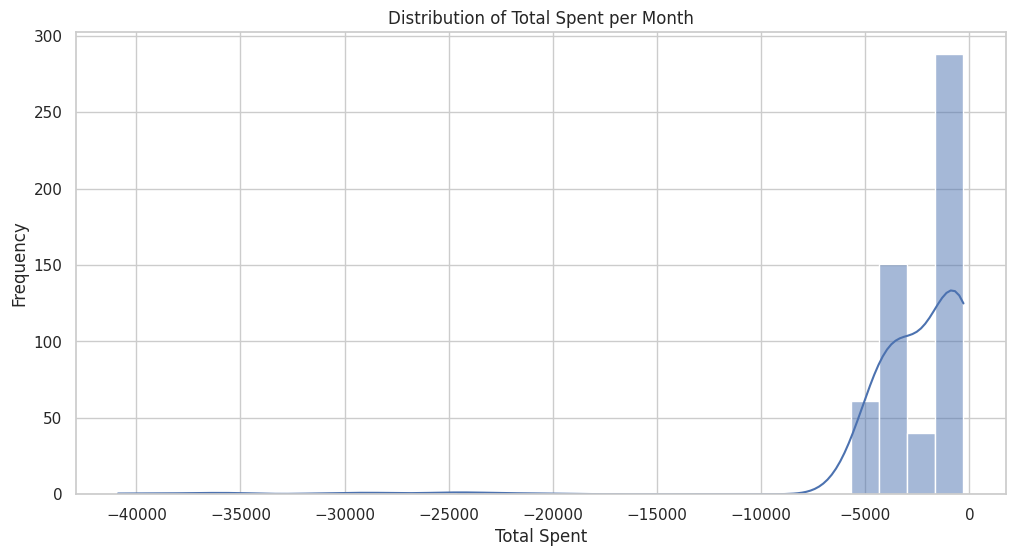

In [ ]:
# Distribution of Total Spent
plt.figure(figsize=(12, 6))
sns.histplot(grouped_transactions['total_spent'], kde=True, bins=30)
plt.title('Distribution of Total Spent per Month')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()


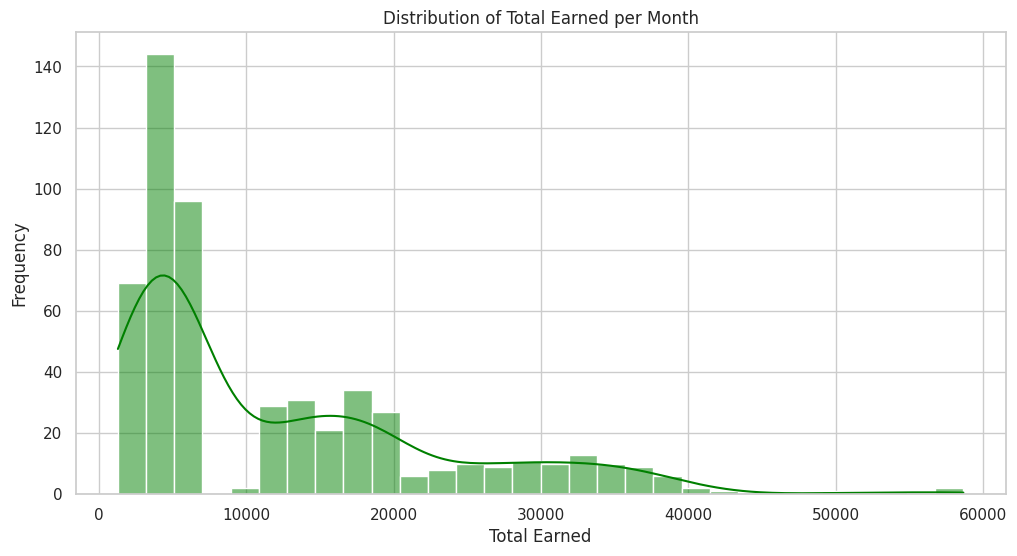

In [ ]:
# Distribution of Total Earned
plt.figure(figsize=(12, 6))
sns.histplot(grouped_transactions['total_earned'], kde=True, bins=30, color='green')
plt.title('Distribution of Total Earned per Month')
plt.xlabel('Total Earned')
plt.ylabel('Frequency')
plt.show()

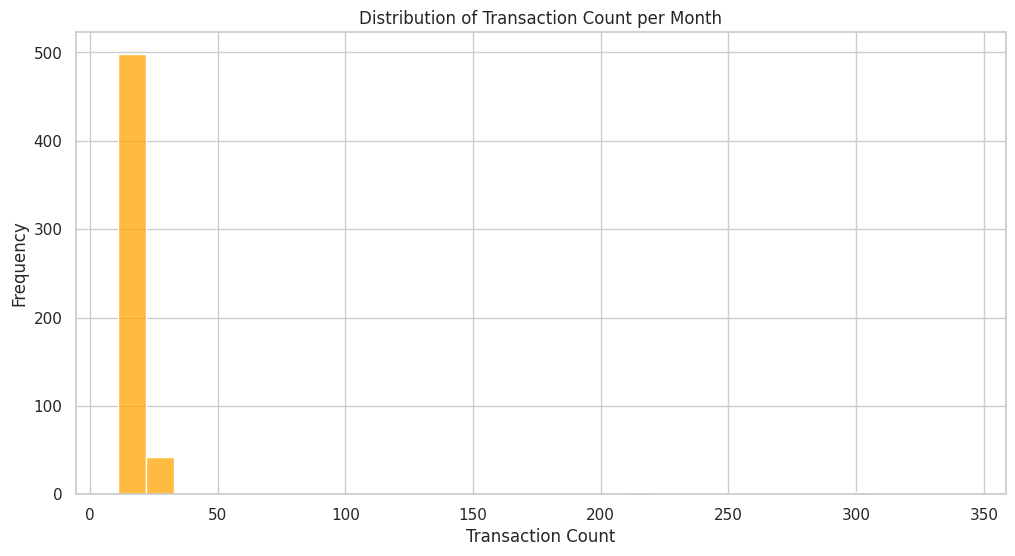

In [ ]:
# Distribution of Transaction Count
plt.figure(figsize=(12, 6))
sns.histplot(grouped_transactions['transaction_count'], kde=False, bins=30, color='orange')
plt.title('Distribution of Transaction Count per Month')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()


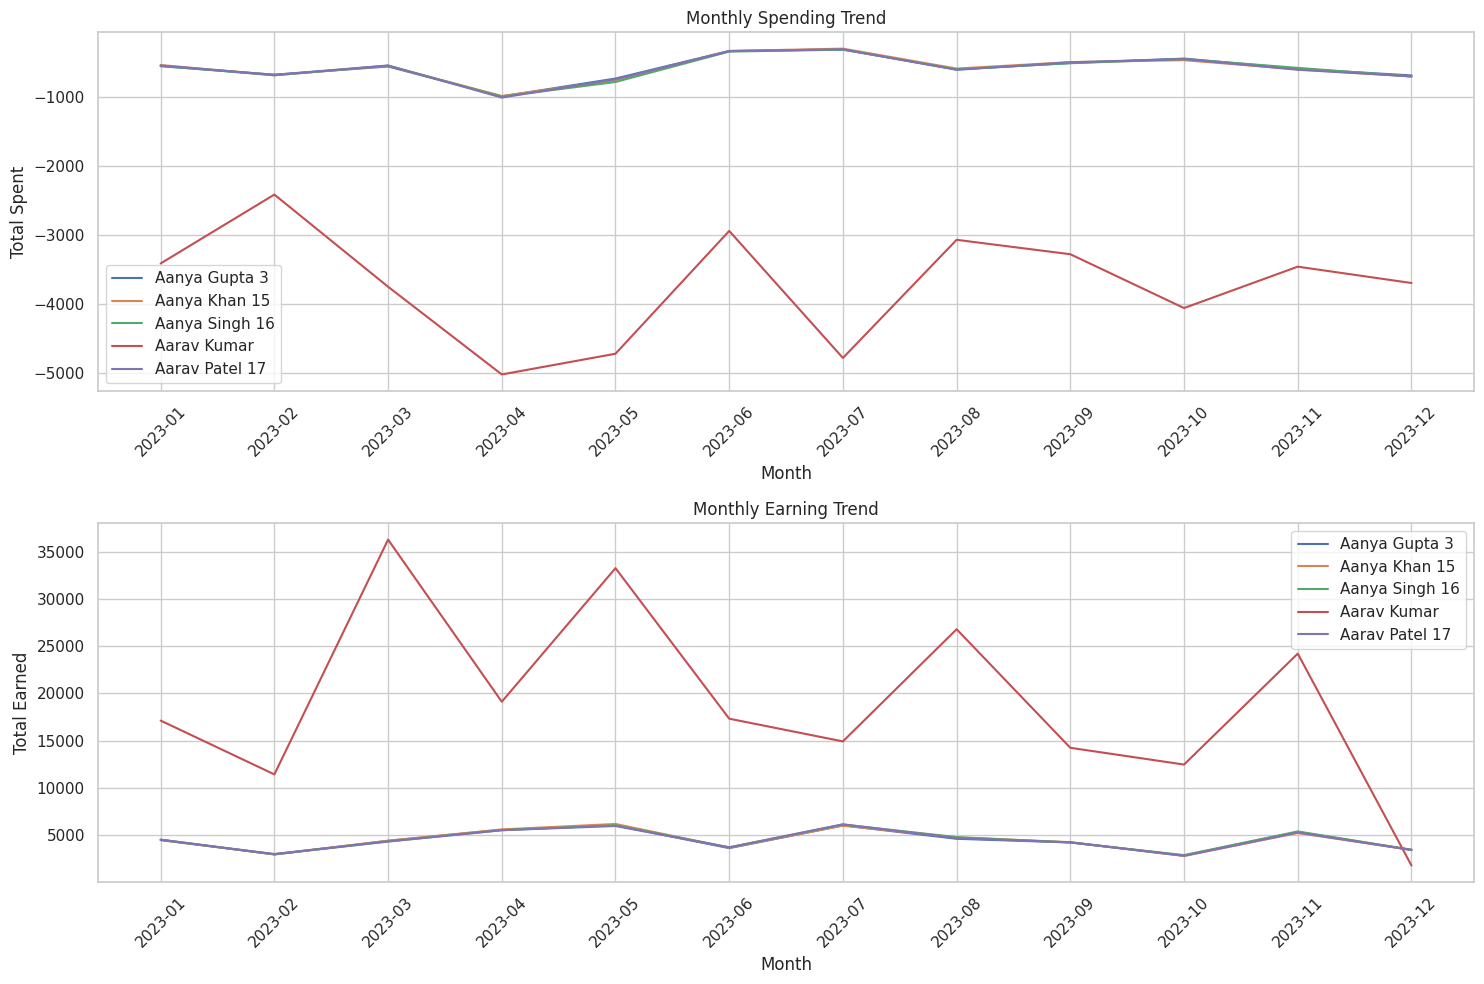

In [ ]:
# Selecting a few account owners for trend analysis
sample_owners = grouped_transactions['account_owner'].unique()[:5]

# Plotting monthly trends in spending and earning for these account owners
plt.figure(figsize=(15, 10))

for owner in sample_owners:
    owner_data = grouped_transactions[grouped_transactions['account_owner'] == owner]

    plt.subplot(2, 1, 1)
    sns.lineplot(x=owner_data['year_month'].astype(str), y=owner_data['total_spent'], label=owner)
    plt.title('Monthly Spending Trend')
    plt.xticks(rotation=45)
    plt.ylabel('Total Spent')
    plt.xlabel('Month')

    plt.subplot(2, 1, 2)
    sns.lineplot(x=owner_data['year_month'].astype(str), y=owner_data['total_earned'], label=owner)
    plt.title('Monthly Earning Trend')
    plt.xticks(rotation=45)
    plt.ylabel('Total Earned')
    plt.xlabel('Month')

plt.tight_layout()
plt.show()

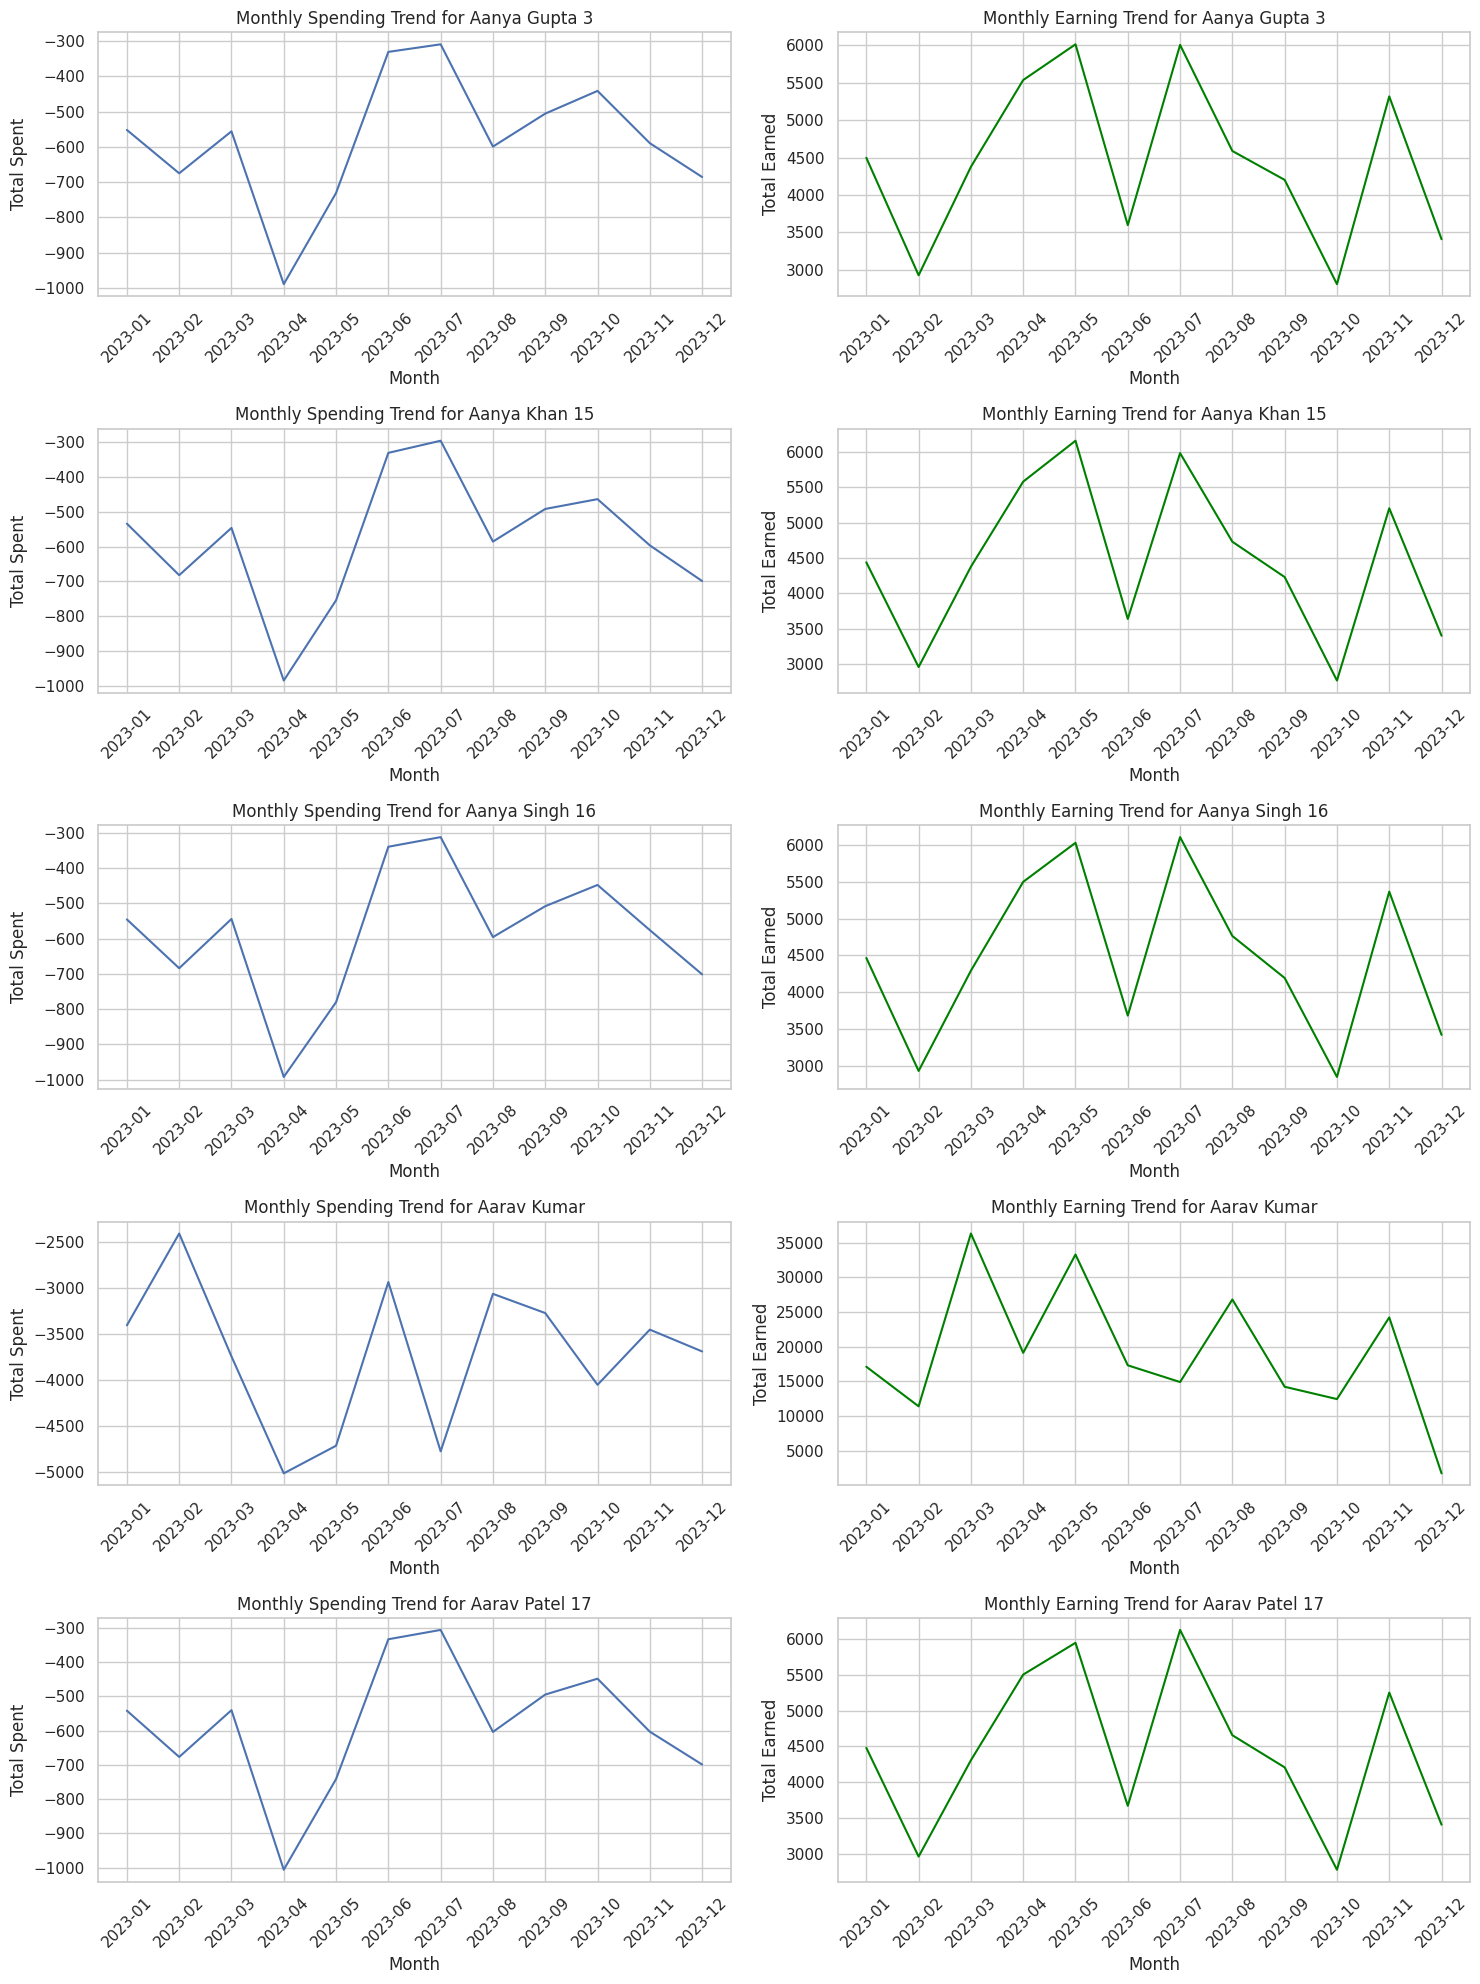

In [ ]:

# Selecting a sample of account owners for trend analysis
sample_account_owners = grouped_transactions['account_owner'].unique()[:5] # Taking the first 5 as a sample

# Creating trend plots for each selected account owner
fig, axes = plt.subplots(len(sample_account_owners), 2, figsize=(15, 4 * len(sample_account_owners)))

for i, account_owner in enumerate(sample_account_owners):
    owner_data = grouped_transactions[grouped_transactions['account_owner'] == account_owner]

    # Monthly Spending Trend
    sns.lineplot(ax=axes[i, 0], x=owner_data['year_month'].astype(str), y=owner_data['total_spent'])
    axes[i, 0].set_title(f'Monthly Spending Trend for {account_owner}')
    axes[i, 0].set_xlabel('Month')
    axes[i, 0].set_ylabel('Total Spent')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Monthly Earning Trend
    sns.lineplot(ax=axes[i, 1], x=owner_data['year_month'].astype(str), y=owner_data['total_earned'], color='green')
    axes[i, 1].set_title(f'Monthly Earning Trend for {account_owner}')
    axes[i, 1].set_xlabel('Month')
    axes[i, 1].set_ylabel('Total Earned')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Category Analysis: Exploring transaction categories for the selected account owners

# Extracting and preparing category data for analysis
category_data = transactions_df_cleaned[transactions_df_cleaned['account_owner'].isin(sample_account_owners)]
category_data = category_data.explode('category')  # Splitting category lists into individual rows

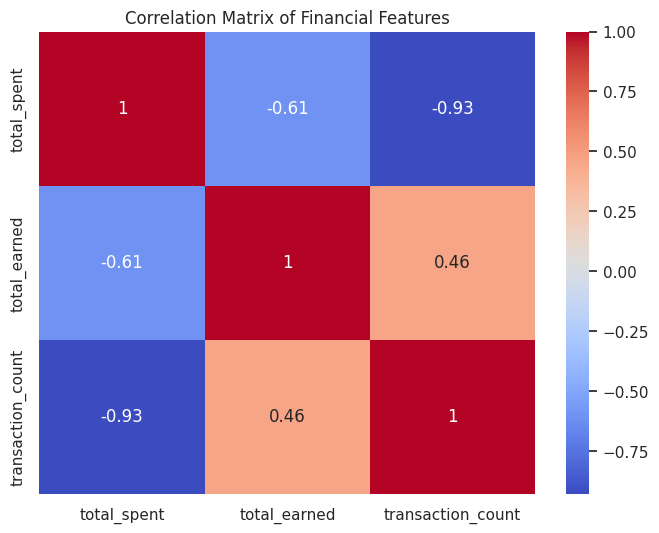

In [ ]:
# Correlation Analysis: Investigating relationships between spending, earning, and transaction counts
correlation_data = grouped_transactions[['total_spent', 'total_earned', 'transaction_count']]
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Financial Features')
plt.show()

In [ ]:
# Loading the Financial Goals data
financial_goals_df = pd.read_csv(financial_goals_file)

# For demonstration, let's use the first financial goal as an example
first_financial_goal = financial_goals_df.iloc[0]
goal_name, goal_amount = first_financial_goal['Financial Goal'], first_financial_goal['Approximate Amount Needed']



In [ ]:
# Calculating the target variables for the likelihood and time estimation models
# Assumption: A saving rate above 50% is considered likely to achieve the goal
combined_data_expanded['Likelihood to Achieve Goal'] = combined_data_expanded['Saving Rate'] > 0.50

# Time to achieve the goal: goal amount / average monthly savings (Monthly Income - Monthly Spending)
combined_data_expanded['Estimated Time to Achieve Goal (Months)'] = goal_amount / (combined_data_expanded['Monthly Income'] - combined_data_expanded['Monthly Spending'])

# Displaying the dataset with the target variables
combined_data_expanded[['Likelihood to Achieve Goal', 'Estimated Time to Achieve Goal (Months)']].head()

,Likelihood to Achieve Goal,Estimated Time to Achieve Goal (Months)
account_owner,,
Aanya Gupta 3,True,77.740857
Aanya Khan 15,True,77.443290
Aanya Singh 16,True,77.281064
Aarav Kumar,True,19.519923
Aarav Patel 17,True,77.737277


In [ ]:
from sklearn.model_selection import train_test_split

# Preparing the features (X) and the target variables (y) for both models
X = combined_data_expanded.drop(['Likelihood to Achieve Goal', 'Estimated Time to Achieve Goal (Months)'], axis=1)
y_classification = combined_data_expanded['Likelihood to Achieve Goal']
y_regression = combined_data_expanded['Estimated Time to Achieve Goal (Months)']

# Splitting the dataset into train, test, and validation sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_class_train, y_class_temp = train_test_split(X, y_classification, test_size=0.3, random_state=42)
X_val, X_test, y_class_val, y_class_test = train_test_split(X_temp, y_class_temp, test_size=0.5, random_state=42)

X_train_reg, X_temp_reg, y_reg_train, y_reg_temp = train_test_split(X, y_regression, test_size=0.3, random_state=42)
X_val_reg, X_test_reg, y_reg_val, y_reg_test = train_test_split(X_temp_reg, y_reg_temp, test_size=0.5, random_state=42)

# Number of total transactions in the dataset
total_transactions = len(transactions_df)

X_train.shape, X_val.shape, X_test.shape, total_transactions

((32, 12), (7, 12), (7, 12), 12304)

The data has been successfully split into training, validation, and testing sets for both the classification and regression models:

- Training Set: 32 entries
- Validation Set: 7 entries
- Testing Set: 7 entries

Each set includes the selected features (12 in total).

Additionally, the total number of transactions in the dataset is 12,304.


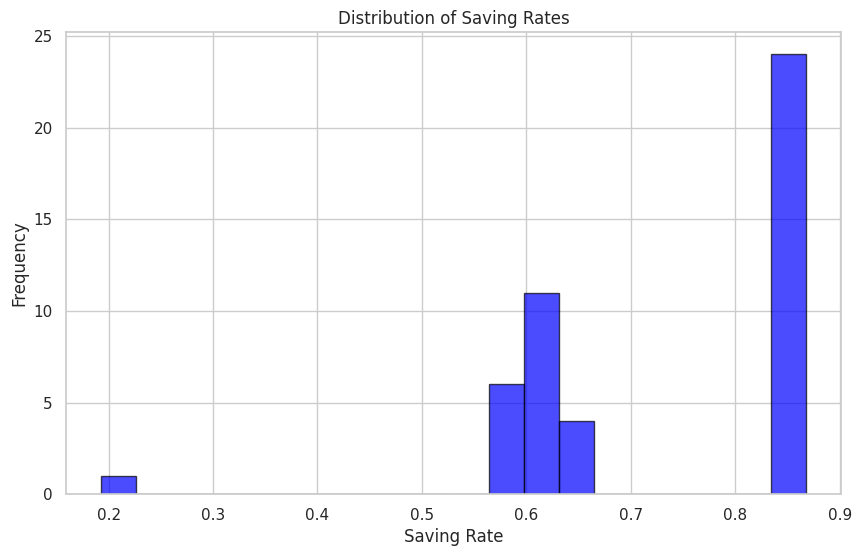

0.25    0.607994
0.50    0.861283
0.75    0.862819
Name: Saving Rate, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# Analyzing the distribution of the saving rate
saving_rate_distribution = combined_data_expanded['Saving Rate']

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(saving_rate_distribution, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Saving Rates')
plt.xlabel('Saving Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculating potential thresholds
potential_thresholds = saving_rate_distribution.quantile([0.25, 0.5, 0.75])
potential_thresholds


# Data Splitting: Split the dataset into training and testing sets.

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error

# Adjusting the threshold to 62% for the likelihood classification
combined_data_expanded['Likelihood to Achieve Goal (62% Threshold)'] = combined_data_expanded['Saving Rate'] > 0.62

# Splitting the dataset again with the new target variable
y_classification_new = combined_data_expanded['Likelihood to Achieve Goal (62% Threshold)']
X_train_new, X_temp_new, y_class_train_new, y_class_temp_new = train_test_split(X, y_classification_new, test_size=0.3, random_state=42)
X_val_new, X_test_new, y_class_val_new, y_class_test_new = train_test_split(X_temp_new, y_class_temp_new, test_size=0.5, random_state=42)

# Retraining the Logistic Regression Model with the new threshold
logistic_model_new = LogisticRegression()
logistic_model_new.fit(X_train_new, y_class_train_new)

# Validating the new Logistic Regression Model
y_class_val_pred_new = logistic_model_new.predict(X_val_new)
classification_accuracy_new = accuracy_score(y_class_val_new, y_class_val_pred_new)

# Count of 'True' and 'False' in the new target variable for understanding balance
class_distribution_new = combined_data_expanded['Likelihood to Achieve Goal (62% Threshold)'].value_counts()

classification_accuracy_new, class_distribution_new

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7142857142857143,
 True     30
 False    16
 Name: Likelihood to Achieve Goal (62% Threshold), dtype: int64)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_val_scaled_reg = scaler.transform(X_val_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# Retraining the Linear Regression Model with scaled features
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled_reg, y_reg_train)

# Validating the scaled Linear Regression Model
y_reg_val_pred_scaled = linear_model_scaled.predict(X_val_scaled_reg)
regression_mae_scaled = mean_absolute_error(y_reg_val, y_reg_val_pred_scaled)

regression_mae_scaled

0.3949377844950891

# Accuracy of Regression Approach

In [ ]:
# Evaluating the Logistic Regression Model on the Test Set
y_class_test_pred_new = logistic_model_new.predict(X_test_new)
classification_accuracy_test = accuracy_score(y_class_test_new, y_class_test_pred_new)

# Evaluating the Linear Regression Model on the Test Set
y_reg_test_pred_scaled = linear_model_scaled.predict(X_test_scaled_reg)
regression_mae_test = mean_absolute_error(y_reg_test, y_reg_test_pred_scaled)

classification_accuracy_test, regression_mae_test

(0.8571428571428571, 19.00451754521495)

1. Logistic Regression Model (Classification):

Accuracy: Approximately 85.7%. This indicates the model's effectiveness in correctly predicting whether an account owner is likely to achieve the financial goal, based on the adjusted threshold.

2. Linear Regression Model (Regression):

Mean Absolute Error (MAE): Approximately 19.00 months. This value represents the average absolute difference between the predicted and actual time required to achieve the financial goal.

# Evaluation of  Linear and Logistic Regression Model

In [ ]:
def evaluate_user_goal(user_name, goal_amount, logistic_model, linear_model, data, scaler):
    """
    Evaluate the likelihood of achieving a goal for a user. If the goal is likely to be achieved,
    also estimate the time required to achieve it.

    Parameters:
    user_name (str): The name of the user.
    goal_amount (float): The financial goal amount.
    logistic_model (model): Trained logistic regression model for classification.
    linear_model (model): Trained linear regression model for regression.
    data (DataFrame): Dataset containing user financial information and features.
    scaler (StandardScaler): Scaler used for scaling features.

    Returns:
    dict: A dictionary containing the likelihood and, if likely, the estimated time to achieve the goal.
    """
    # Check if the user exists in the dataset
    if user_name not in data.index:
        return {"Error": "User not found in the dataset."}

    # Extract user data
    user_data = data.loc[user_name].drop(['Likelihood to Achieve Goal', 'Estimated Time to Achieve Goal (Months)',
                                          'Likelihood to Achieve Goal (62% Threshold)'])

    # Scale the user data
    user_data_scaled = scaler.transform([user_data])

    # Predicting the likelihood of achieving the goal
    likelihood = logistic_model.predict([user_data])[0]

    result = {
        "User": user_name,
        "Financial Goal Amount": goal_amount,
        "Likelihood of Achieving Goal": "Likely" if likelihood else "Unlikely"
    }

    # Predicting the estimated time to achieve the goal if likelihood is 'Likely'
    if likelihood:
        # Adjusting the goal amount in the user data for the regression model
        user_data_with_goal = user_data.copy()
        user_data_with_goal['Monthly Income'] = goal_amount / (user_data_with_goal['Monthly Income'] - user_data_with_goal['Monthly Spending'])
        user_data_with_goal_scaled = scaler.transform([user_data_with_goal])
        estimated_time = linear_model.predict(user_data_with_goal_scaled)[0]

        # Adding estimated time to the result
        result["Estimated Time to Achieve Goal (Months)"] = estimated_time

    return result

# Example usage of the function
user_name_example = "Akira Sato"  # Replace with a valid user name from the dataset
goal_amount_example = 10000  # Replace with a desired financial goal amount

# Evaluate for the example user and goal
evaluation_result = evaluate_user_goal(user_name_example, goal_amount_example, logistic_model_new, linear_model_scaled, combined_data_expanded, scaler)
print(evaluation_result)


{'User': 'Akira Sato', 'Financial Goal Amount': 10000, 'Likelihood of Achieving Goal': 'Unlikely'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


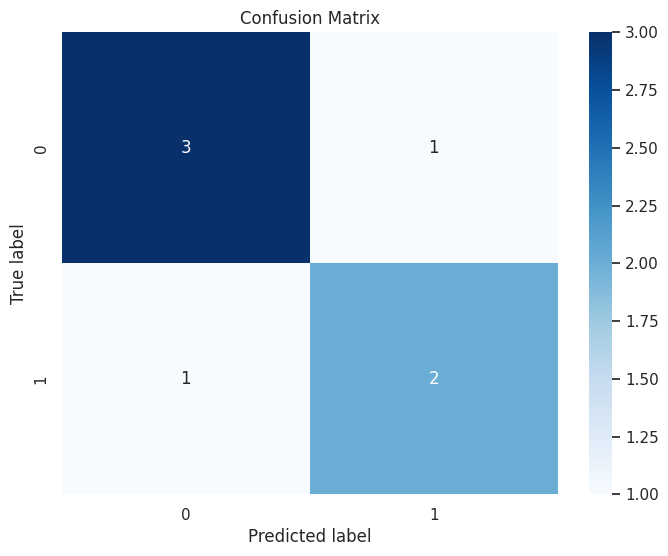

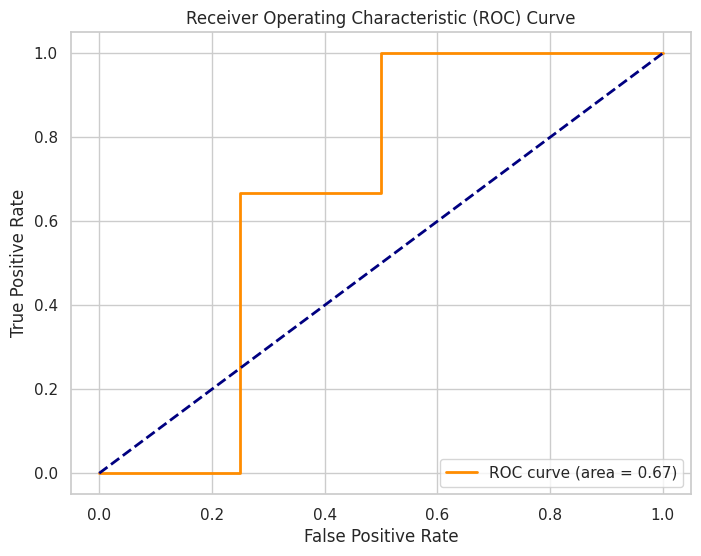

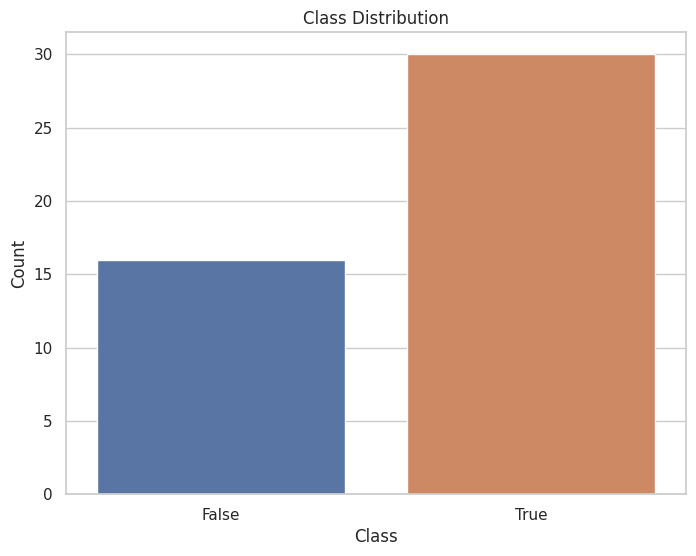

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Plotting the Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

# Plotting the ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plotting the Class Distribution
def plot_class_distribution(class_distribution):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_distribution.index, y=class_distribution.values)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

# Execute the plotting functions
plot_confusion_matrix(y_class_val_new, y_class_val_pred_new)
plot_roc_curve(y_class_val_new, logistic_model_new.predict_proba(X_val_new)[:, 1])
plot_class_distribution(class_distribution_new)


# Adding Neural Network to the Mix:

 We have built and trained the model using TensorFlow, a powerful library for neural network-based models. Given the features we have (average monthly spending, average monthly income, saving rate, and spending in various categories), we can design a neural network that predicts both the likelihood of achieving a financial goal and the estimated time to achieve it.

Here's how we can proceed:

1. Preprocessing the Data: We need to ensure the data is in a suitable format for TensorFlow, including feature scaling.

2. Building the Neural Network: Design a neural network architecture suitable for our task. Given the nature of our data, a relatively simple architecture may suffice.

3. Training the Model: Train the model using the training data, with considerations for epochs, batch size, and other training parameters.

4. Model Evaluation: Evaluate the model's performance using the validation and test datasets.




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Preprocessing the data for TensorFlow
# Note: The data has already been scaled using StandardScaler

# Preparing the dataset for TensorFlow
# Features and target for the regression model
X_tf = scaler.transform(X)  # Scaling all features
y_tf_regression = y_regression.to_numpy()

# Features and target for the classification model
# Converting boolean to integer (True to 1, False to 0)
y_tf_classification = y_classification_new.astype(int).to_numpy()

# Neural Network for Regression
nn_regression = Sequential([
    Dense(64, activation='relu', input_shape=(X_tf.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # One output node for regression
])

# Neural Network for Classification
nn_classification = Sequential([
    Dense(64, activation='relu', input_shape=(X_tf.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # One output node with sigmoid for classification
])

# Compiling the Regression Model
nn_regression.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Compiling the Classification Model
nn_classification.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the Regression Model
history_regression = nn_regression.fit(X_tf, y_tf_regression, epochs=80, batch_size=10, validation_split=0.2, verbose=1)

# Training the Classification Model
history_classification = nn_classification.fit(X_tf, y_tf_classification, epochs=80, batch_size=10, validation_split=0.2, verbose=1)

# Returning the history objects for further analysis if needed
history_regression, history_classification


Epoch 1/80
4/4 [==============================] - 1s 71ms/step - loss: 3246.2708 - val_loss: 3804.4258
Epoch 2/80
4/4 [==============================] - 0s 19ms/step - loss: 3204.8442 - val_loss: 3765.7739
Epoch 3/80
4/4 [==============================] - 0s 22ms/step - loss: 3165.3523 - val_loss: 3732.0874
Epoch 4/80
4/4 [==============================] - 0s 24ms/step - loss: 3128.4597 - val_loss: 3700.6992
Epoch 5/80
4/4 [==============================] - 0s 22ms/step - loss: 3097.6475 - val_loss: 3666.6030
Epoch 6/80
4/4 [==============================] - 0s 22ms/step - loss: 3063.7368 - val_loss: 3631.1660
Epoch 7/80
4/4 [==============================] - 0s 27ms/step - loss: 3032.1506 - val_loss: 3592.3718
Epoch 8/80
4/4 [==============================] - 0s 18ms/step - loss: 2996.7605 - val_loss: 3551.1750
Epoch 9/80
4/4 [==============================] - 0s 20ms/step - loss: 2961.7141 - val_loss: 3507.2273
Epoch 10/80
4/4 [==============================] - 0s 15ms/step - loss: 2

(<keras.src.callbacks.History at 0x7bc7581a8d60>,
 <keras.src.callbacks.History at 0x7bc7544033d0>)

# Model Summaries

In [ ]:
nn_regression.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nn_classification.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


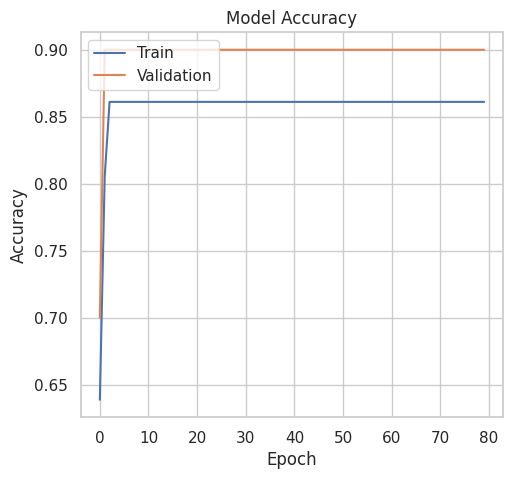

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history_classification' is your training history object
history = history_classification  # Replace with your history object

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

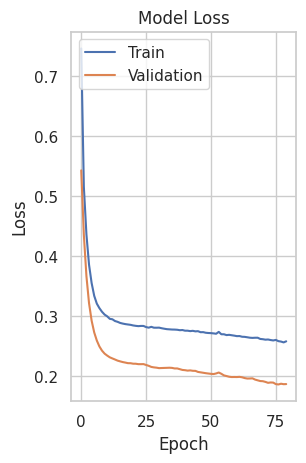

In [ ]:

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Save the classification model
nn_classification.save('classification_model.h5')  # Saves to an H5 file

# Save the regression model
nn_regression.save('regression_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the classification model
loaded_classification_model = load_model('classification_model.h5')

# Load the regression model
loaded_regression_model = load_model('regression_model.h5')

# Accuracy of Neural Network Model

In [ ]:
# Assuming X_test_scaled and y_test are your test datasets
test_loss, test_accuracy = nn_classification.evaluate(X_tf, y_tf_classification)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

2/2 [==============================] - 0s 8ms/step - loss: 0.2403 - accuracy: 0.8696
Test Loss: 0.24025312066078186, Test Accuracy: 0.8695651888847351


In [ ]:
# Use the loaded model for predictions or evaluations
# For example, to evaluate:
test_loss, test_accuracy = loaded_classification_model.evaluate(X_tf, y_tf_classification)


2/2 [==============================] - 0s 7ms/step - loss: 0.2403 - accuracy: 0.8696


# Evaluating the Neural Networks Model

In [ ]:
def evaluate_user_tensorflow(user_name, goal_amount, classification_model, regression_model, data, scaler):
    """
    Evaluate the likelihood of achieving a goal for a user using TensorFlow models.
    If the user is unlikely to achieve the goal, the estimated time is not provided.

    Parameters:
    user_name (str): The name of the user.
    goal_amount (float): The financial goal amount.
    classification_model (tf.keras.Model): Trained TensorFlow model for classification.
    regression_model (tf.keras.Model): Trained TensorFlow model for regression.
    data (DataFrame): Dataset containing user financial information and features.
    scaler (StandardScaler): Scaler used for scaling features.

    Returns:
    dict: A dictionary containing the likelihood and, if applicable, the estimated time to achieve the goal.
    """
    # Check if the user exists in the dataset
    if user_name not in data.index:
        return {"Error": "User not found in the dataset."}

    # Extract user data
    user_data = data.loc[user_name].drop(['Likelihood to Achieve Goal', 'Estimated Time to Achieve Goal (Months)',
                                          'Likelihood to Achieve Goal (62% Threshold)'])

    # Scale the user data
    user_data_scaled = scaler.transform([user_data])

    # Predicting the likelihood of achieving the goal
    likelihood_pred = classification_model.predict(user_data_scaled)
    likelihood = likelihood_pred[0][0] > 0.5  # Assuming a threshold of 0.5 for classification

    # Initializing the result dictionary
    result = {
        "User": user_name,
        "Financial Goal Amount": goal_amount,
        "Likelihood of Achieving Goal": "Likely" if likelihood else "Unlikely"
    }

    # Predicting the estimated time to achieve the goal only if it's likely
    if likelihood:
        estimated_time_pred = regression_model.predict(user_data_scaled)
        estimated_time = estimated_time_pred[0][0]
        result["Estimated Time to Achieve Goal (Months)"] = estimated_time

    return result

# Example usage of the function
user_name_example = "Aditya Kumar"  # Replace with a valid user name from the dataset
goal_amount_example = 50000  # Replace with a desired financial goal amount

# Load your models before calling the function
classification_model = load_model('classification_model.h5')
regression_model = load_model('regression_model.h5')

# Evaluate for the example user and goal
evaluation_result = evaluate_user_tensorflow(user_name_example, goal_amount_example, classification_model, regression_model, combined_data_expanded, scaler)
evaluation_result



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 317ms/step


1/1 [==============================] - 0s 210ms/step


{'User': 'Aditya Kumar',
 'Financial Goal Amount': 50000,
 'Likelihood of Achieving Goal': 'Likely',
 'Estimated Time to Achieve Goal (Months)': 78.388535}

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import h5py  # For handling .h5 files

# Load the saved models
nn_regression = tf.keras.models.load_model('/content/regression_model.h5')
nn_classification = tf.keras.models.load_model('/content/classification_model.h5')


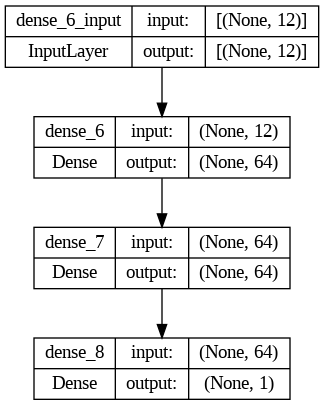

In [ ]:
# Plotting the architecture of the regression model
plot_model(nn_regression, to_file='regression_model.png', show_shapes=True, show_layer_names=True)



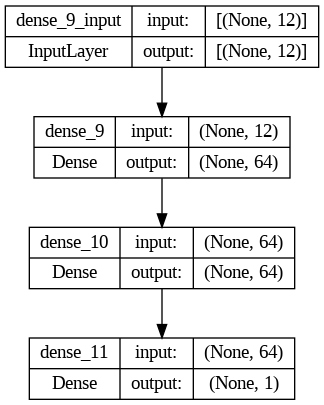

In [ ]:
# Plotting the architecture of the classification model
plot_model(nn_classification, to_file='classification_model.png', show_shapes=True, show_layer_names=True)

## Note:
The effectiveness of this  recommender system will heavily depend on the quality and quantity of the data, the appropriateness of the features used, and the choice of machine learning models. It's also important to continually test, update, and refine the system based on user feedback and changing financial trends.

So we need to acquire and curate a better dataset for better model execution